# Species Segmentation with Cluster Analysis

## About Dataset

The Iris flower dataset is one of the most popular for cluster analysis. More information can be found [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).

There are 4 features: sepal length, sepal width, petal length, and petal width.

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

Load data from the csv file.

In [2]:
raw_data = pd.read_csv("iris-dataset.csv")
raw_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

Cluster the iris flowers by the shape of their sepal using the `sepal_length` and `sepal_width` variables. 

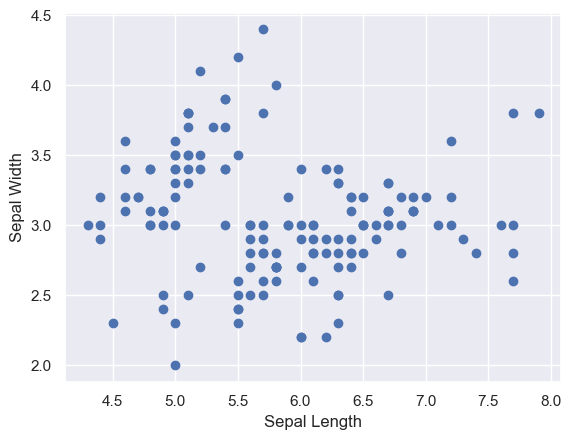

In [3]:
# Create a scatter plot
plt.scatter(raw_data["sepal_length"], raw_data["sepal_width"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Clustering (unscaled data)

Separate the original data into 2 clusters.

In [4]:
# Create a copy of dataset
x = raw_data.copy()

In [5]:
# Create kmeans object with two clusters and fit and predict clusters for each observation
kmeans = KMeans(2, n_init="auto")
data = raw_data.copy()
clusters = kmeans.fit_predict(x)
data["Cluster"] = clusters

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


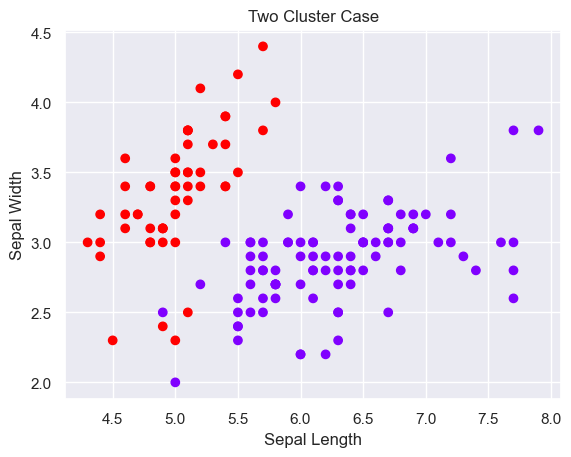

In [6]:
# Create a scatter plot that colors data based on clusters
plt.scatter(data["sepal_length"], data["sepal_width"], c=data["Cluster"], cmap="rainbow")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Two Cluster Case")
plt.show()

# Standardize the variables

In [7]:
# Scale data to get better results
from sklearn.preprocessing import scale

scaled_x = scale(x)

# Clustering (scaled data)

In [8]:
# Create kmeans object with two clusters for scaled data
kmeans_2 = KMeans(2, n_init="auto")
data2 = raw_data.copy()
clusters_2 = kmeans_2.fit_predict(scaled_x)
data2["Cluster"] = clusters_2

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


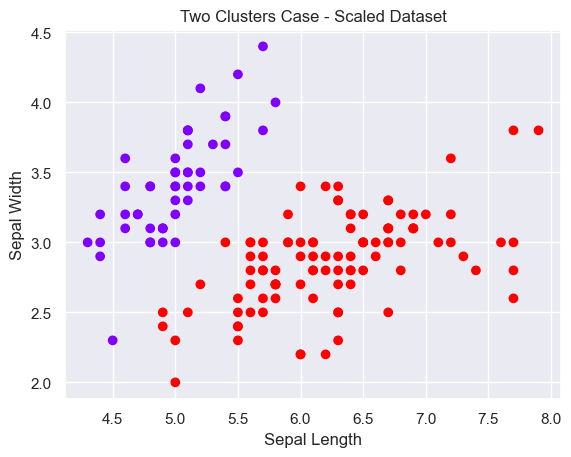

In [9]:
# Create scatter plot
plt.scatter(data2["sepal_length"], data2["sepal_width"], c=data2["Cluster"], cmap="rainbow")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Two Clusters Case - Scaled Dataset")
plt.show()

Looks like the two solutions are identical. That is because the original features have very similar scales.

## The Elbow Method

### WCSS

In [10]:
# Find Within-cluster sum of squares values for each number of clusters
num_cluster = 11
wcss = []
for i in range(1, num_cluster):
    kmeans = KMeans(i, n_init="auto")
    kmeans.fit(scaled_x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

### The Elbow Method

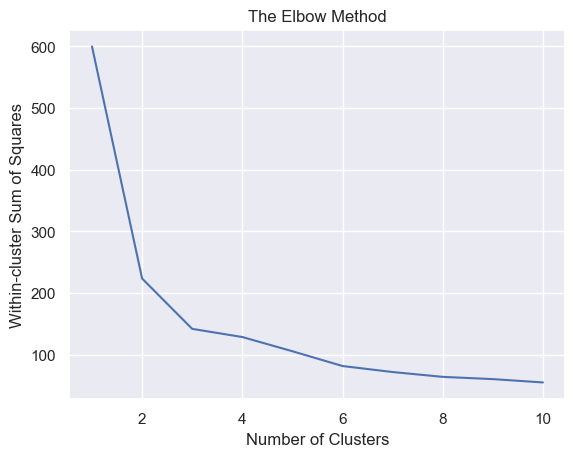

In [11]:
# Plot the elbow method
plt.plot(range(1, num_cluster), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("Within-cluster Sum of Squares")
plt.title("The Elbow Method")
plt.show()

It seems that 2 or 3 clusters would work the best. Also 5 clusters might work.

## Understanding the Elbow Curve

Compare plots with different number of clusters.

### Three Clusters

In [12]:
# Create kmeans object with three clusters for scaled data
kmeans_3 = KMeans(3, n_init="auto")
data3 = raw_data.copy()
clusters_3 = kmeans_3.fit_predict(scaled_x)
data3["Cluster"] = clusters_3

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Five Clusters

In [13]:
# Create kmeans object with five clusters for scaled data
kmeans_5 = KMeans(5, n_init="auto")
data5 = raw_data.copy()
clusters_5 = kmeans_5.fit_predict(scaled_x)
data5["Cluster"] = clusters_5

C:\Users\ttomk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, '5 Clusters Case')

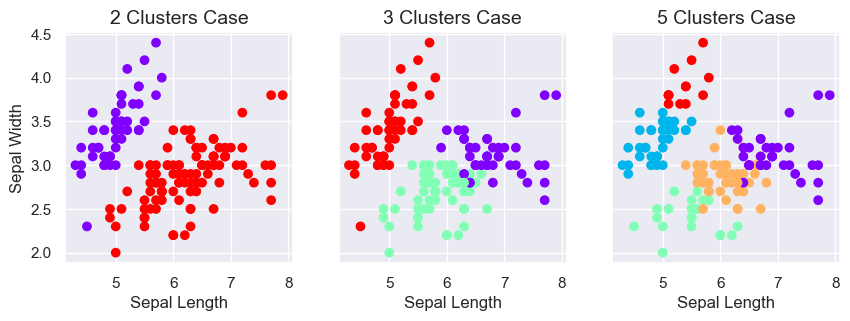

In [14]:
# Create scatter plot for all cases and compare
fig, axes = plt.subplots(ncols=3, figsize=(10,3), sharey=True)

plt.sca(axes[0])
plt.scatter(data2["sepal_length"], data2["sepal_width"], c=data2["Cluster"], cmap="rainbow")
plt.xlabel("Sepal Length", fontsize=12)
plt.ylabel("Sepal Width", fontsize=12)
plt.title("2 Clusters Case", fontsize=14)

plt.sca(axes[1])
plt.scatter(data3["sepal_length"], data3["sepal_width"], c=data3["Cluster"], cmap="rainbow")
plt.xlabel("Sepal Length", fontsize=12)
plt.title("3 Clusters Case", fontsize=14)

plt.sca(axes[2])
plt.scatter(data5["sepal_length"], data5["sepal_width"], c=data5["Cluster"], cmap="rainbow")
plt.xlabel("Sepal Length", fontsize=12)
plt.title("5 Clusters Case", fontsize=14)

Based on the original dataset there are only 3 species of iris and therefore having 5 clusters is not realistic. The Elbow method is not perfect. Instead of clustering this dataset should be classified.